<h1> 1. Understanding the Dataset </h1>

<h3> IMPORT </h3>

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [2]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<h3> UNDERSTANDING THE DATA </h3>

In [3]:
#check the columns of train dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#structure of train dataset
print('original rows:', train.shape[0], 'original columns:', train.shape[1])

#structure of test dataset
print('test rows:', test.shape[0], 'test columns:', test.shape[1])

original rows: 1460 original columns: 81
test rows: 1459 test columns: 80


In [5]:
#training data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#testing data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
#types of variables 
np.unique(train.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
#Variables with float64
train.select_dtypes(include = ['float64']).dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [9]:
#variables with integer
train.select_dtypes(include = ['int64']).dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [10]:
#Variables with object
train.select_dtypes(include = ['object']).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

<h3> Variables </h3>

In [11]:
#Numerical Variables
numerics = ['int64', 'float64']
numeric_train  = train.select_dtypes(include = numerics)  
numeric_train = numeric_train.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','GarageYrBlt', 'MoSold', 'YrSold', 'YearRemodAdd', 'OverallQual',
                                             'OverallCond', 'YearBuilt','MSSubClass'])
numeric_train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000


In [12]:
# Factor Variables
factors = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
train_factors = train[factors]
train_factors.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,7,5,2003,2003,2003.0,2,2008
1,20,6,8,1976,1976,1976.0,5,2007
2,60,7,5,2001,2002,2001.0,9,2008
3,70,7,5,1915,1970,1998.0,2,2006
4,60,8,5,2000,2000,2000.0,12,2008


In [13]:
# Categorical Variables: Turned into Dummies by Owner
categories = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
train_categories = train[categories]
train_categories.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,1,0,2,1
1,0,1,2,0
2,1,0,2,1
3,1,0,1,0
4,1,0,2,1


In [14]:
# Categorical Variables 
categori = ['object']
catego = train.select_dtypes(include= categori)
catego.head()
categorical_train = pd.concat([catego, train_categories], axis=1, sort=False)
categorical_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,NaN,NaN,NaN,WD,Normal,0,1,2,0
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,NaN,NaN,NaN,WD,Abnorml,1,0,1,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,NaN,NaN,NaN,WD,Normal,1,0,2,1


<h3> UNDERSTAND THE SALEPRICE </h3>

In [15]:
#summary on SalePrice(target variable) from train dataset
train['SalePrice'].describe()
#All prices are greater than 0.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


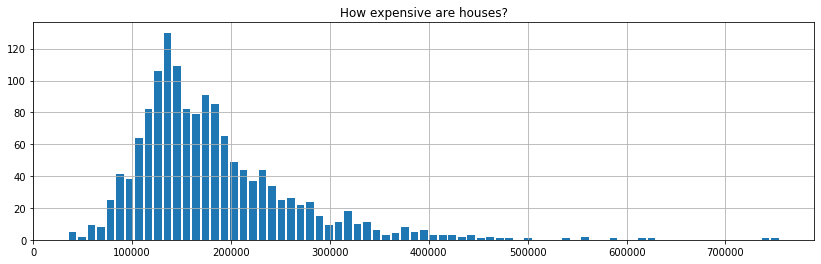

In [16]:
# How expensive are houses?
import matplotlib.pyplot as plt
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [17]:
#Remove outlier
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

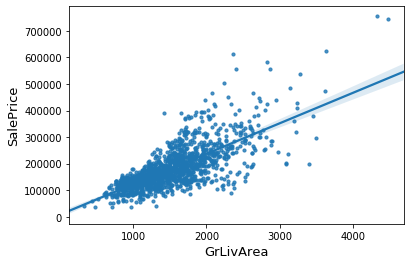

In [18]:
#Check if outlier was removed successfully
fig, ax = plt.subplots()
ax = sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [19]:
train.shape   #2 Rows Gone from the removing the outlier

(1458, 81)

In [20]:
# Sales Price
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(train.SalePrice.skew(), train.SalePrice.kurtosis()))
#skew: 1.881, kurtosis: 6.523

Skew: 1.881 | Kurtosis: 6.523


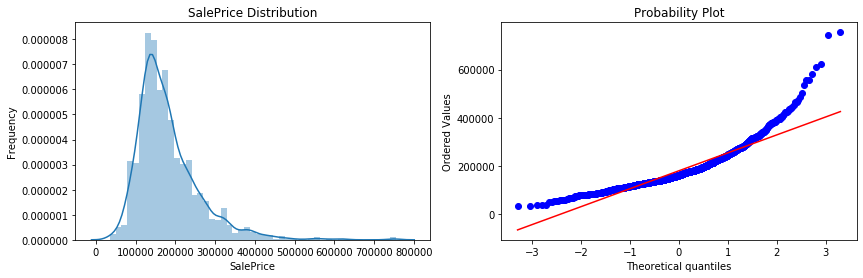

In [21]:
#histogram of SalePrice to see the distribution 
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(train['SalePrice'], ax = ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice Distribution')
#QQ-plot
stats.probplot(train['SalePrice'], plot=plt)
plt.show()
#this is right skewed (violating assumptions of linear regression) so we will need to normalize
#by doing log transformation 

In [22]:
# SalePrice log transformation
y_log = np.log1p(train['SalePrice'])

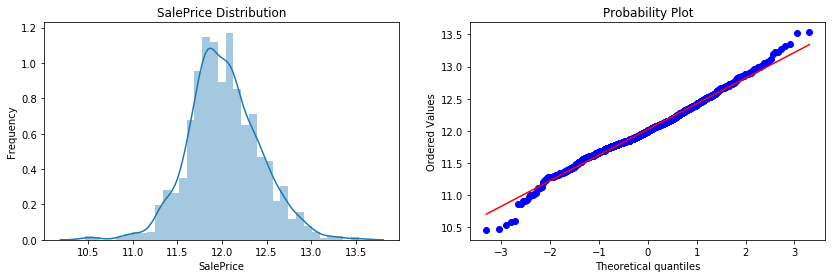

In [23]:
#histogram of SalePrice to see the distribution after log transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))
sns.distplot(y_log, ax = ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice Distribution')
#QQ-plot
stats.probplot(y_log, plot=plt)
plt.show()

<h3> EDA </h3>

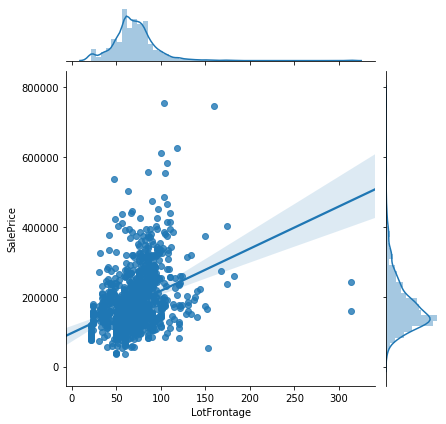

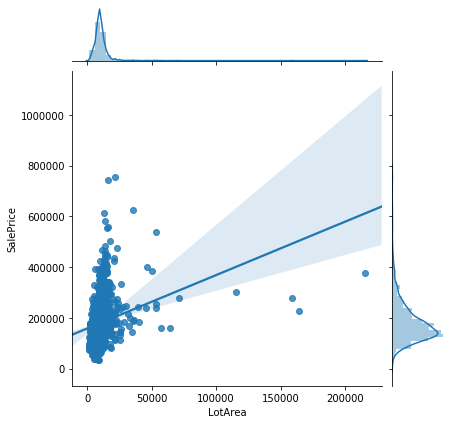

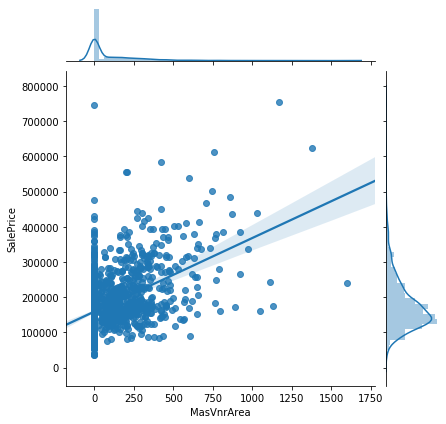

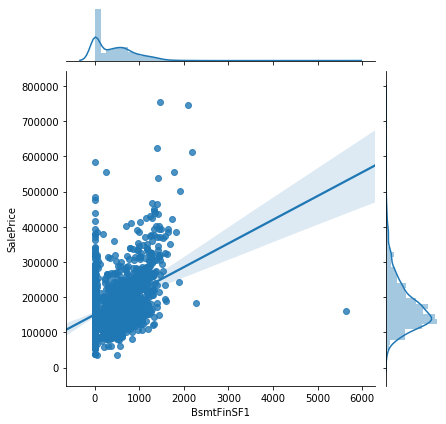

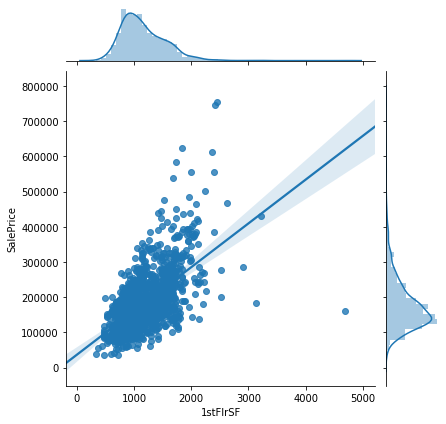

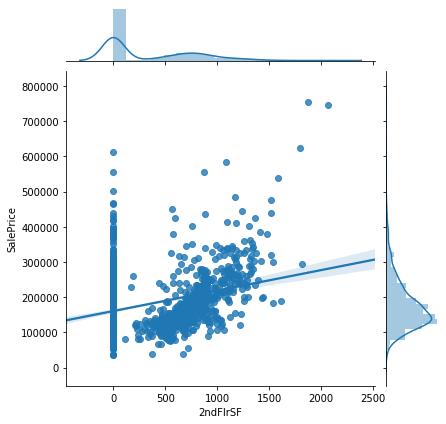

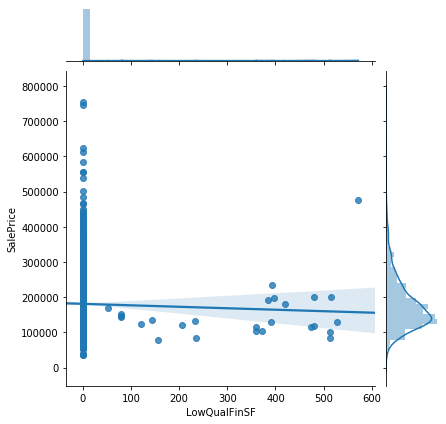

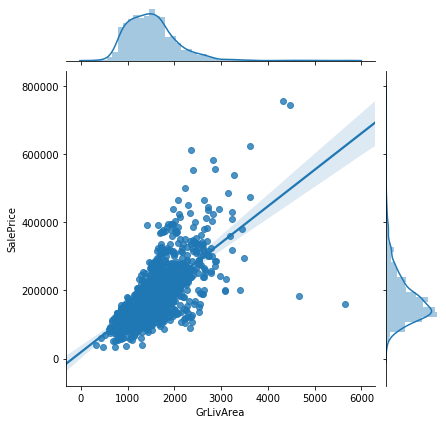

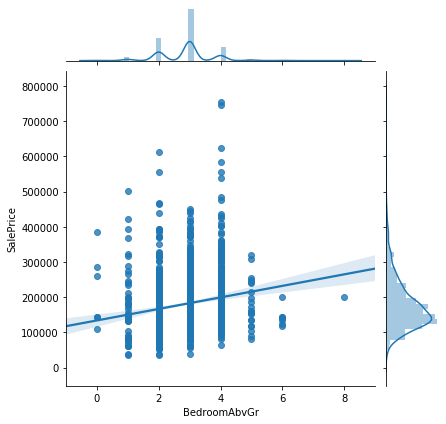

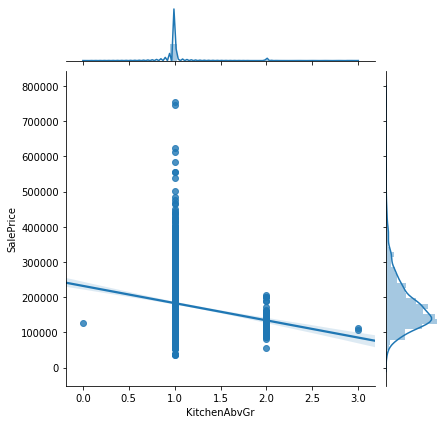

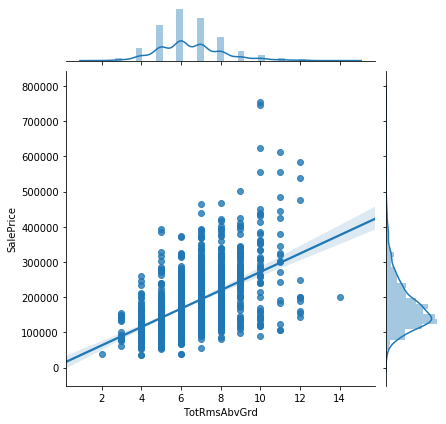

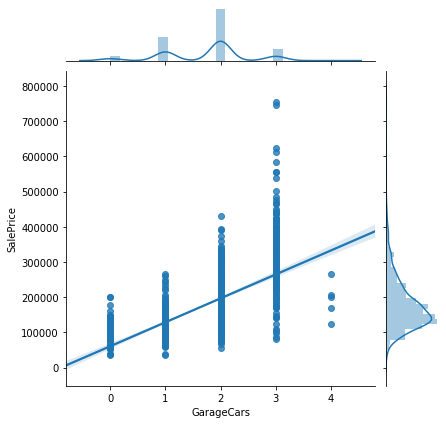

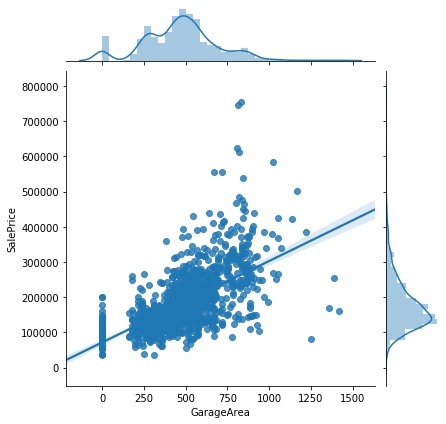

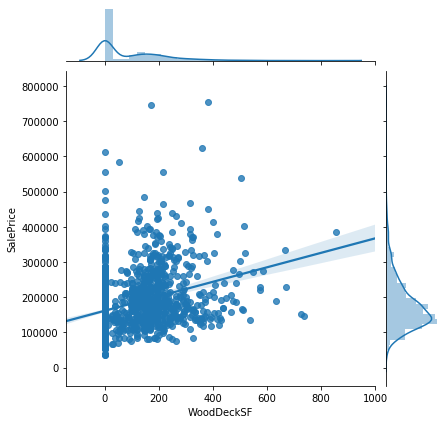

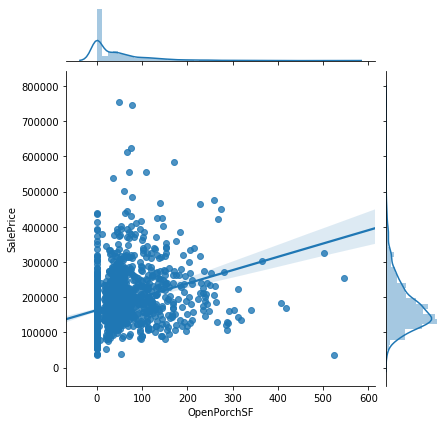

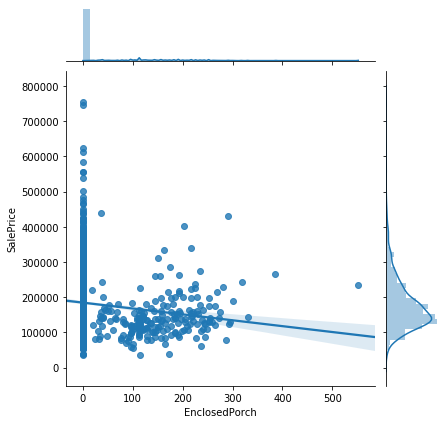

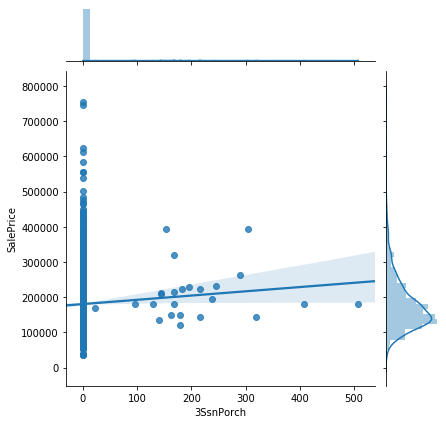

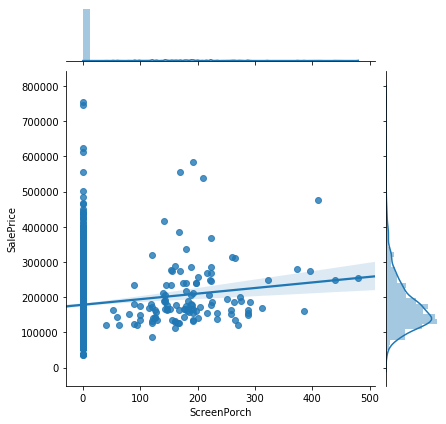

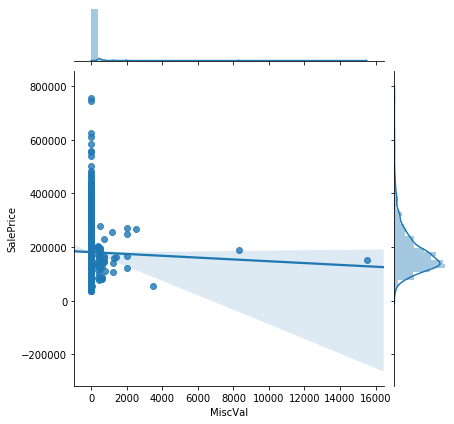

In [24]:
# Here is a scatter plot with dist plot for all numeric variables in the train data 
#by Sale Price
sns.jointplot(x="LotFrontage", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="LotArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MasVnrArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BsmtFinSF1", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="1stFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="2ndFlrSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x='LowQualFinSF', y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GrLivArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="BedroomAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="KitchenAbvGr", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="TotRmsAbvGrd", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageCars", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="GarageArea", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="WoodDeckSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="OpenPorchSF", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="EnclosedPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="3SsnPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="ScreenPorch", y="SalePrice", data=numeric_train, kind = 'reg')
sns.jointplot(x="MiscVal", y="SalePrice", data=numeric_train, kind = 'reg')


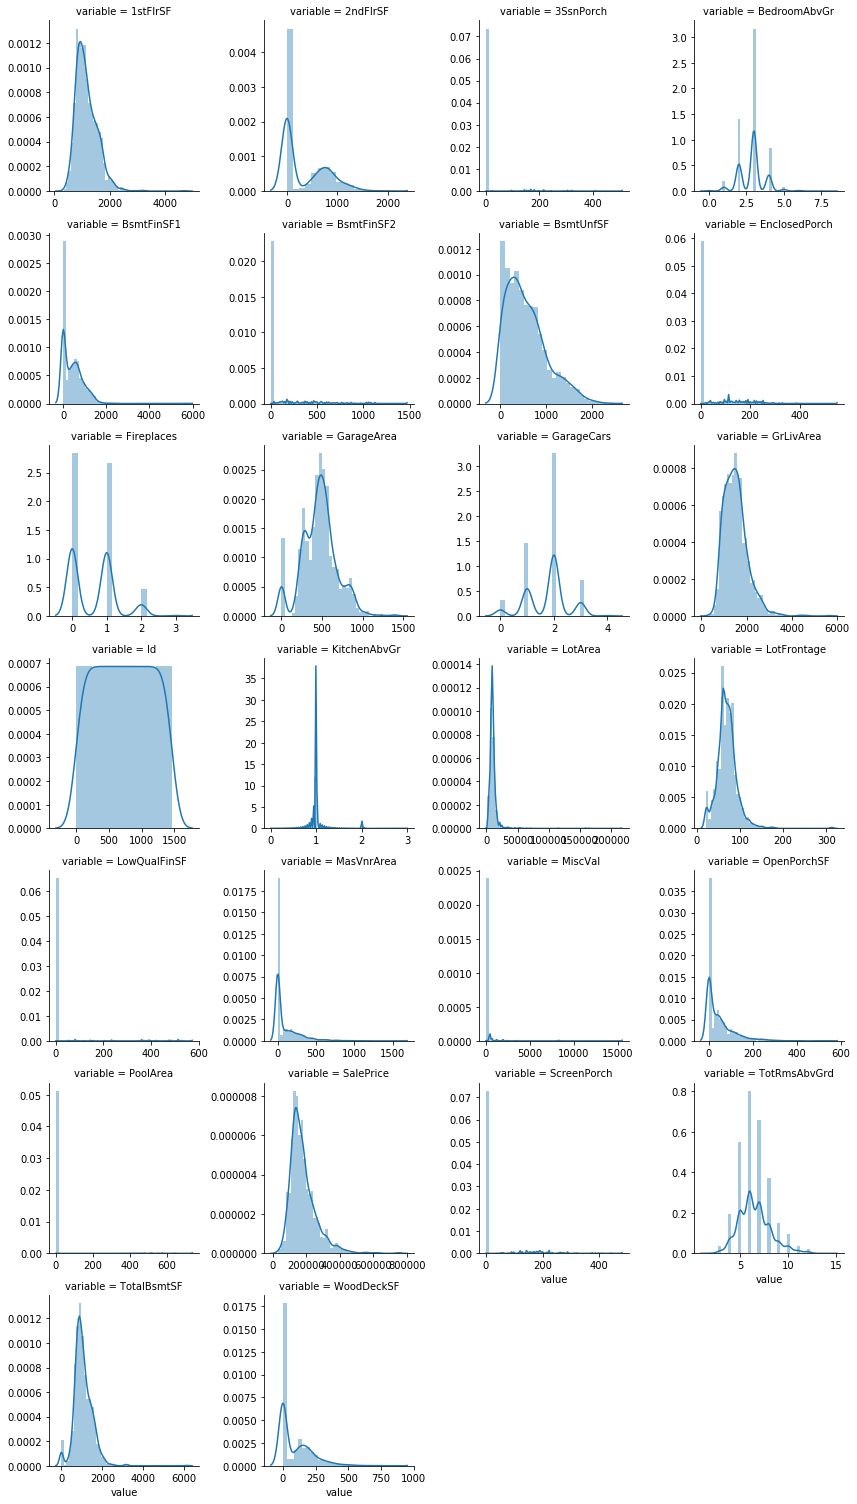

In [25]:
## Distribution Plots for Numerical Features
# Grid of distribution plots of all numerical features
f = pd.melt(numeric_train, value_vars=sorted(numeric_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

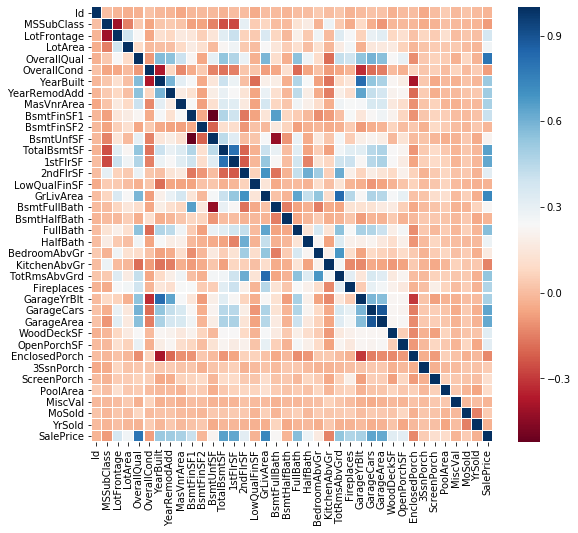

In [26]:
#Numeric variables correlation
numcor = train.corr()
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize = (9,8))
sns.heatmap(numcor, ax=ax, cmap = colormap, linewidths = 0.1)

In [27]:
#Which ones are highly correlated?
s = numcor.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600741
              SalePrice       0.795774
YearBuilt     GarageYrBlt     0.825317
YearRemodAdd  GarageYrBlt     0.641604
BsmtFinSF1    BsmtFullBath    0.658507
TotalBsmtSF   1stFlrSF        0.803830
              SalePrice       0.651153
1stFlrSF      TotalBsmtSF     0.803830
              SalePrice       0.631530
2ndFlrSF      GrLivArea       0.694678
              HalfBath        0.608830
              TotRmsAbvGrd    0.614034
GrLivArea     2ndFlrSF        0.694678
              FullBath        0.638378
              TotRmsAbvGrd    0.829498
              SalePrice       0.734968
BsmtFullBath  BsmtFinSF1      0.658507
FullBath      GrLivArea       0.638378
HalfBath      2ndFlrSF        0.608830
BedroomAbvGr  TotRmsAbvGrd    0.680390
TotRmsAbvGrd  2ndFlrSF        0.614034
              GrLivArea       0.829498
              BedroomAbvGr    0.680390
GarageYrBlt   YearBuilt       0.825317
              YearRemodAdd    0.641604
GarageCars    OverallQual

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


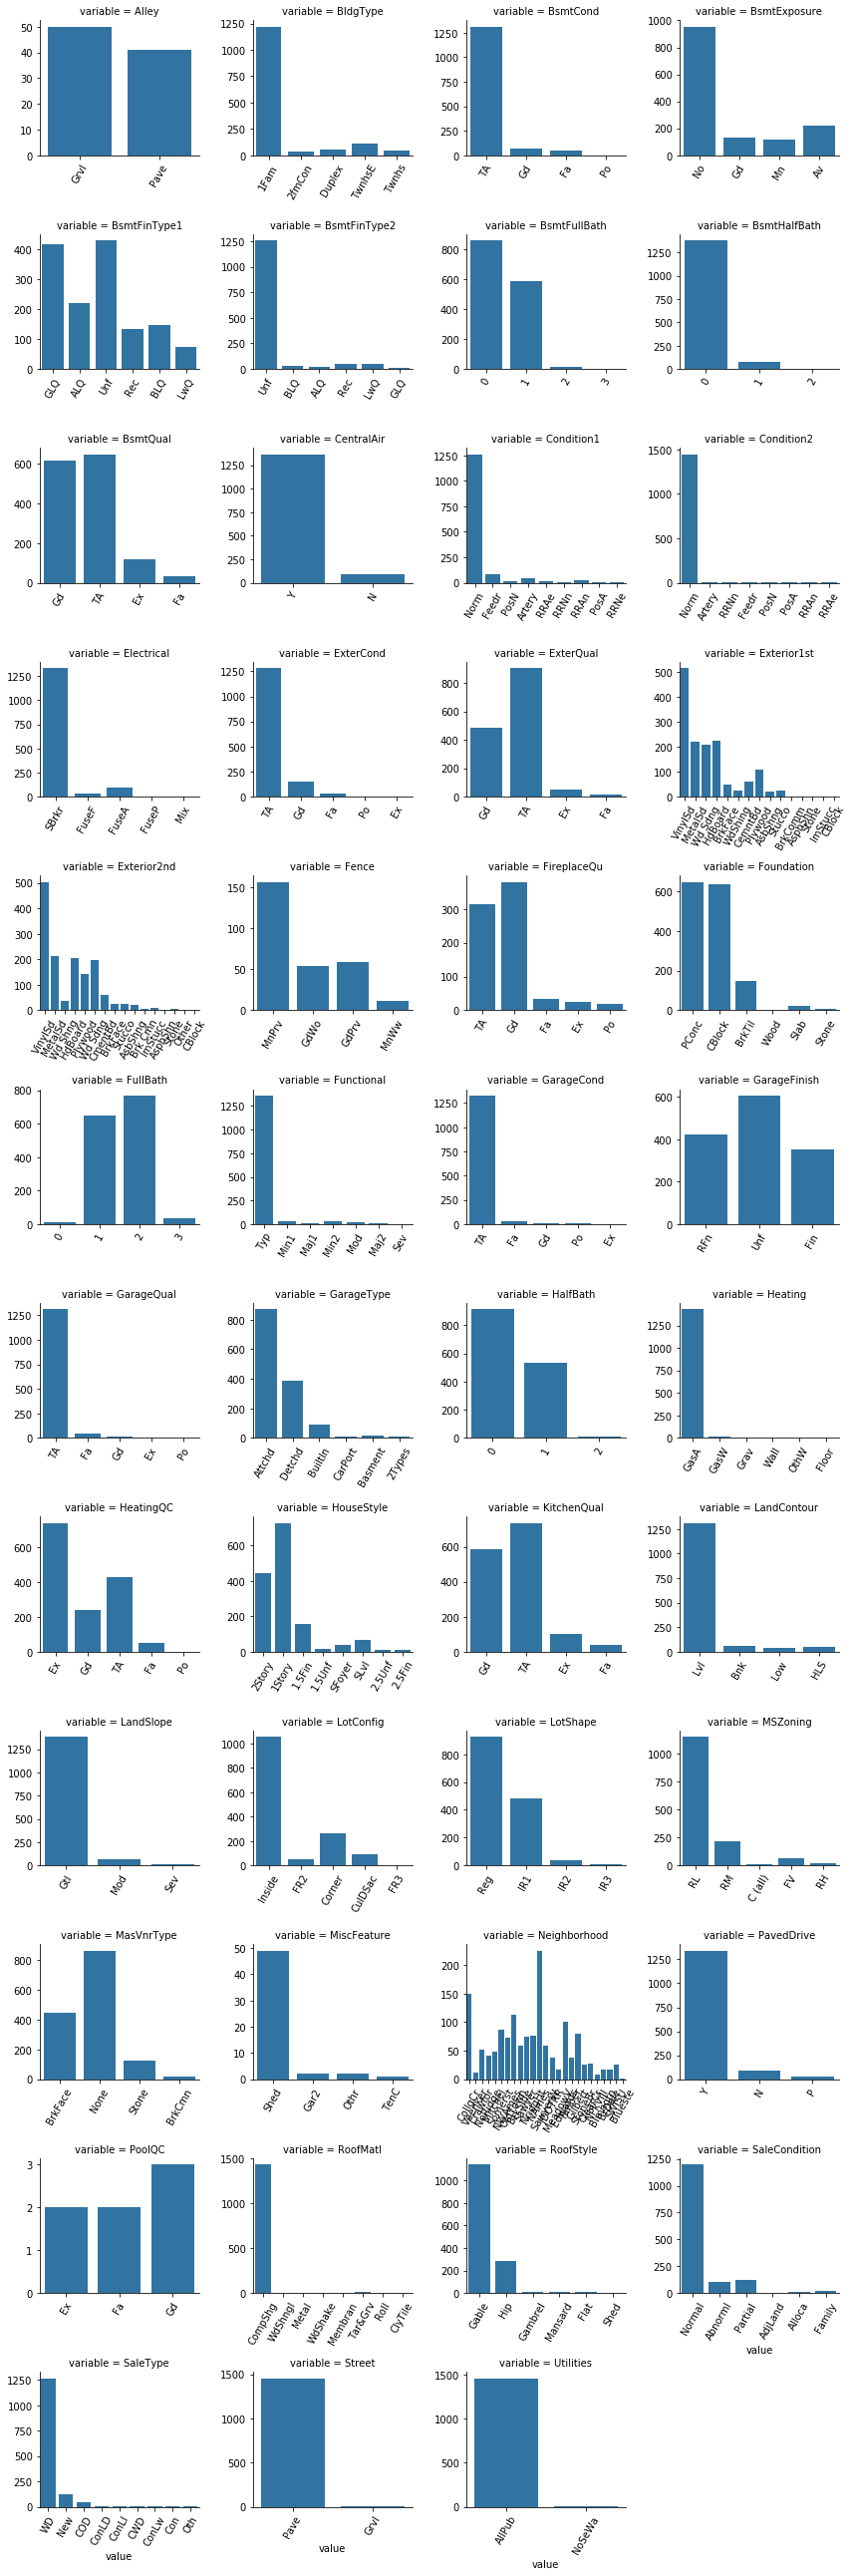

In [28]:
# Categorical Variables
categorical_train.columns
f = pd.melt(categorical_train, value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


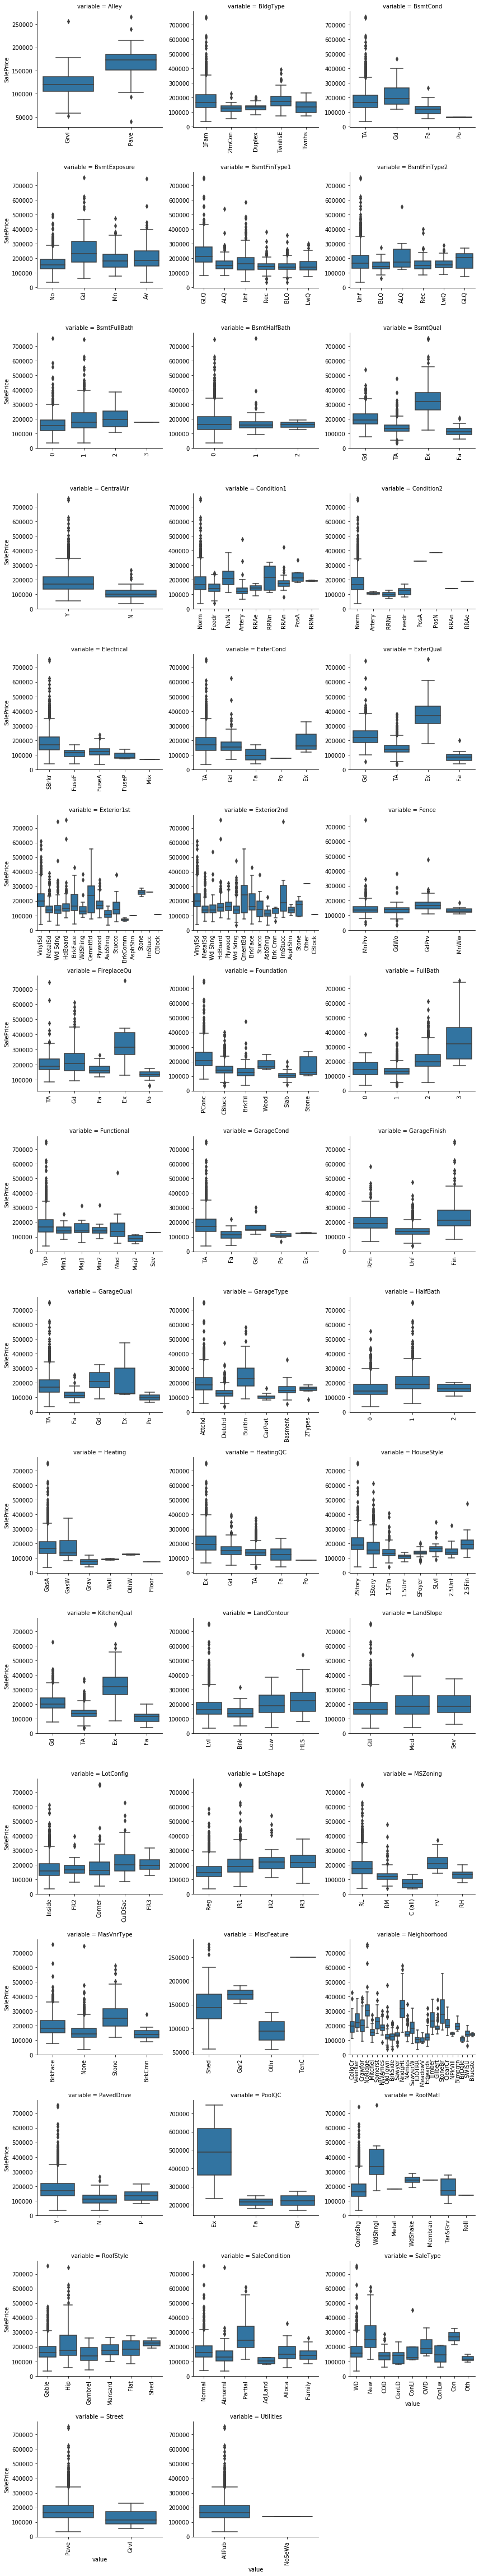

In [29]:
# Box Plot for Categorical Features
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(categorical_train))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

/Users/bee/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


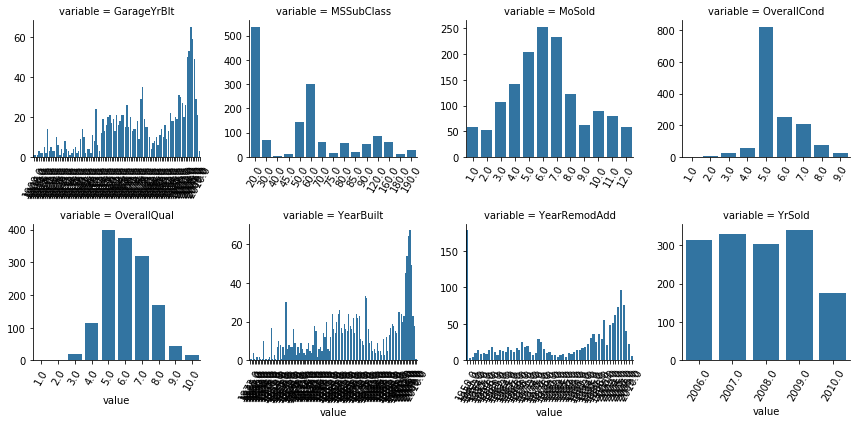

In [30]:
# Graphing Factors
f = pd.melt(train_factors, value_vars=sorted(train_factors))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Oldest house built in 1872. Newest house built in 2010.


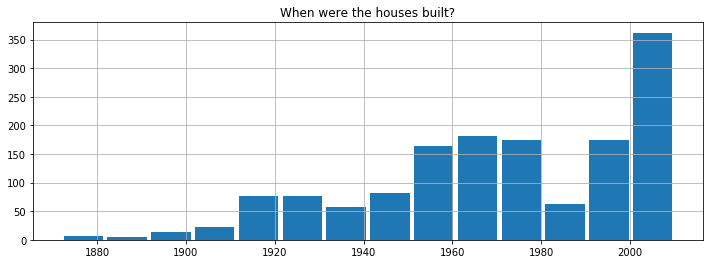

In [31]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

<h1> 2. Data Cleaning </h1>

<h3> Missing </h3>

In [32]:
# Missing Values Data Frame: Train 
missing = train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/train.shape[0] * 100
train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
train_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1452.0,99.588477
MiscFeature,1404.0,96.296296
Alley,1367.0,93.758573
Fence,1177.0,80.727023
FireplaceQu,690.0,47.325103
LotFrontage,259.0,17.764060
GarageType,81.0,5.555556
GarageYrBlt,81.0,5.555556
GarageFinish,81.0,5.555556
GarageQual,81.0,5.555556


In [33]:
# Missing Values Data Frame: Test
missing_test = test.isna().sum()
missing_test = missing_test[missing_test>0]
missingtest_percent = missing_test/test.shape[0] * 100
test_missing = pd.DataFrame([missing_test, missingtest_percent], index = ['total', 'missing percent']).T
test_missing.sort_values(['missing percent'], ascending = [False])


,total,missing percent
PoolQC,1456.0,99.794380
MiscFeature,1408.0,96.504455
Alley,1352.0,92.666210
Fence,1169.0,80.123372
FireplaceQu,730.0,50.034270
LotFrontage,227.0,15.558602
GarageCond,78.0,5.346127
GarageYrBlt,78.0,5.346127
GarageQual,78.0,5.346127
GarageFinish,78.0,5.346127


In [34]:
# There are some that has missing only in train dataset and only in test dataset.
# first drop the SalePrice column of train dataset and
# then we will combine two dataset and then clean it. 
trainX = train.drop('SalePrice', axis =1)     #1458 rows with 80 columns
testX = test                                  #1459 rows with 80 columns
test_train = pd.concat([trainX, testX], keys=['train', 'test'])

In [35]:
#Check the test_train dataset
test_train.shape
#2917 rows, 80 columns

(2917, 80)

In [36]:
# Dropping the columns with so many missing values. 
test_train = test_train.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'])
#not dropping poolarea since we can use that to assume that existing value means 
#there is a pool and if data is missing, it might be an indication that there is no pool. 

In [37]:
#Check the test_train dataset
test_train.shape
#2917 rows, 75 columns

(2917, 75)

In [38]:
# Check the original Missing Values Data Frame: Test_Train 
missing = test_train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/test_train.shape[0] * 100
test_train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
test_train_missing.sort_values(['missing percent'], ascending = [False])

,total,missing percent
FireplaceQu,1420.0,48.680151
LotFrontage,486.0,16.660953
GarageFinish,159.0,5.450806
GarageCond,159.0,5.450806
GarageQual,159.0,5.450806
GarageYrBlt,159.0,5.450806
GarageType,157.0,5.382242
BsmtCond,82.0,2.811107
BsmtExposure,82.0,2.811107
BsmtQual,81.0,2.776826


In [39]:
# Preprocessing: Imputation: Filling Missing Values 
test_train.loc[:, "BedroomAbvGr"] = test_train.loc[:, "BedroomAbvGr"].fillna(0)
test_train.loc[:, "BsmtQual"] = test_train.loc[:, "BsmtQual"].fillna("No")
test_train.loc[:, "BsmtCond"] = test_train.loc[:, "BsmtCond"].fillna("No")
test_train.loc[:, "BsmtExposure"] = test_train.loc[:, "BsmtExposure"].fillna("No")
test_train.loc[:, "BsmtFinType1"] = test_train.loc[:, "BsmtFinType1"].fillna("No")
test_train.loc[:, "BsmtFinType2"] = test_train.loc[:, "BsmtFinType2"].fillna("No")
test_train.loc[:, "BsmtFullBath"] = test_train.loc[:, "BsmtFullBath"].fillna(0)
test_train.loc[:, "BsmtHalfBath"] = test_train.loc[:, "BsmtHalfBath"].fillna(0)
test_train.loc[:, "BsmtUnfSF"] = test_train.loc[:, "BsmtUnfSF"].fillna(0)
test_train.loc[:, "CentralAir"] = test_train.loc[:, "CentralAir"].fillna("N")
test_train.loc[:, "Condition1"] = test_train.loc[:, "Condition1"].fillna("Norm")
test_train.loc[:, "Condition2"] = test_train.loc[:, "Condition2"].fillna("Norm")
test_train.loc[:, "EnclosedPorch"] = test_train.loc[:, "EnclosedPorch"].fillna(0)
test_train.loc[:, "ExterCond"] = test_train.loc[:, "ExterCond"].fillna("TA")
test_train.loc[:, "ExterQual"] = test_train.loc[:, "ExterQual"].fillna("TA")
test_train.loc[:, "FireplaceQu"] = test_train.loc[:, "FireplaceQu"].fillna("No")
test_train.loc[:, "Fireplaces"] = test_train.loc[:, "Fireplaces"].fillna(0)
test_train.loc[:, "Functional"] = test_train.loc[:, "Functional"].fillna("Typ")
test_train.loc[:, "GarageType"] = test_train.loc[:, "GarageType"].fillna("No")
test_train.loc[:, "GarageFinish"] = test_train.loc[:, "GarageFinish"].fillna("No")
test_train.loc[:, "GarageQual"] = test_train.loc[:, "GarageQual"].fillna("No")
test_train.loc[:, "GarageCond"] = test_train.loc[:, "GarageCond"].fillna("No")
test_train.loc[:, "GarageArea"] = test_train.loc[:, "GarageArea"].fillna(0)
test_train.loc[:, "GarageCars"] = test_train.loc[:, "GarageCars"].fillna(0)
test_train.loc[:, "HalfBath"] = test_train.loc[:, "HalfBath"].fillna(0)
test_train.loc[:, "HeatingQC"] = test_train.loc[:, "HeatingQC"].fillna("TA")
test_train.loc[:, "KitchenAbvGr"] = test_train.loc[:, "KitchenAbvGr"].fillna(0)
test_train.loc[:, "KitchenQual"] = test_train.loc[:, "KitchenQual"].fillna("TA")
test_train.loc[:, "LotFrontage"] = test_train.loc[:, "LotFrontage"].fillna(0)
test_train.loc[:, "LotShape"] = test_train.loc[:, "LotShape"].fillna("Reg")
test_train.loc[:, "MasVnrType"] = test_train.loc[:, "MasVnrType"].fillna("None")
test_train.loc[:, "MasVnrArea"] = test_train.loc[:, "MasVnrArea"].fillna(0)
test_train.loc[:, "MiscVal"] = test_train.loc[:, "MiscVal"].fillna(0)
test_train.loc[:, "OpenPorchSF"] = test_train.loc[:, "OpenPorchSF"].fillna(0)
test_train.loc[:, "PavedDrive"] = test_train.loc[:, "PavedDrive"].fillna("N")
test_train.loc[:, "SaleCondition"] = test_train.loc[:, "SaleCondition"].fillna("Normal")
test_train.loc[:, "ScreenPorch"] = test_train.loc[:, "ScreenPorch"].fillna(0)
test_train.loc[:, "TotRmsAbvGrd"] = test_train.loc[:, "TotRmsAbvGrd"].fillna(0)
test_train.loc[:, "Utilities"] = test_train.loc[:, "Utilities"].fillna("AllPub")
test_train.loc[:, "WoodDeckSF"] = test_train.loc[:, "WoodDeckSF"].fillna(0)
test_train.loc[:, "Exterior1st"] = test_train.loc[:, "Exterior1st"].fillna("No")
test_train.loc[:, "Exterior2nd"] = test_train.loc[:, "Exterior2nd"].fillna("No")
test_train.loc[:, "BsmtFinSF1"] = test_train.loc[:, "BsmtFinSF1"].fillna(0)
test_train.loc[:, "BsmtFinSF2"] = test_train.loc[:, "BsmtFinSF2"].fillna(0)
test_train.loc[:, "TotalBsmtSF"] = test_train.loc[:, "TotalBsmtSF"].fillna(0)
test_train.loc[:, "Electrical"] = test_train.loc[:, "Electrical"].fillna("Electrical")
test_train.loc[:, "SaleType"] = test_train.loc[:, "SaleType"].fillna("WD")
test_train.loc[:, "GarageYrBlt"] = test_train.loc[:, "GarageYrBlt"].fillna("0")
test_train.loc[:, "PoolArea"] = test_train.loc[:, "PoolArea"].fillna("0")
test_train.loc[:, "MSZoning"] = test_train.loc[:, "MSZoning"].fillna("RL")

In [40]:
# Check the Final Missing Values Data Frame: Test_Train 
missing = test_train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/test_train.shape[0] * 100
test_train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
test_train_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing!

,total,missing percent


In [41]:
#Create a variable for Total SF
#Combine all Bsmt + 1st + 2nd fl, does not distinguish between quality
test_train['TotalSF'] = test_train['TotalBsmtSF'] + test_train['1stFlrSF'] + test_train['2ndFlrSF']

In [42]:
#Create a variable for Total SF
#Combine all Bsmt + 1st + 2nd fl, does not distinguish between quality
test_train['TotalSF'] = test_train['TotalBsmtSF'] + test_train['1stFlrSF'] + test_train['2ndFlrSF']

In [43]:
#Create Variable For Total Bath
#Half Baths are multiplied by 0.5 and Full are added as a whole
test_train['TotalBath'] = test_train['BsmtFullBath'] + test_train['FullBath'] + 0.5* test_train['BsmtHalfBath'] + 0.5 * test_train['HalfBath']

In [44]:
#Create Variable For Total Porch SF
#We do not distinguish between the variables
test_train['TotalPorchSF'] = test_train['WoodDeckSF'] + test_train['OpenPorchSF'] + test_train['EnclosedPorch']+ test_train['3SsnPorch']+ test_train['ScreenPorch']

In [45]:
#find numerical variables so we can check skewness. 
a1=test_train.dtypes[test_train.dtypes != "object"].index

In [46]:
skewed_features = test_train[a1].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [47]:
#box-cox
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to BoxCox transform".format(skewness.shape[0]))
skewed_feats = skewness.index

lam = 0.15
for x in skewed_feats:
    test_train[x] = boxcox1p(test_train[x], lam)
    test_train[x] += 1

There are 38 skewed numerical features to BoxCox transform


In [48]:
# Reassign train dataset from the transformed df
trainX = test_train[:1458]

<Figure size 1440x1440 with 0 Axes>

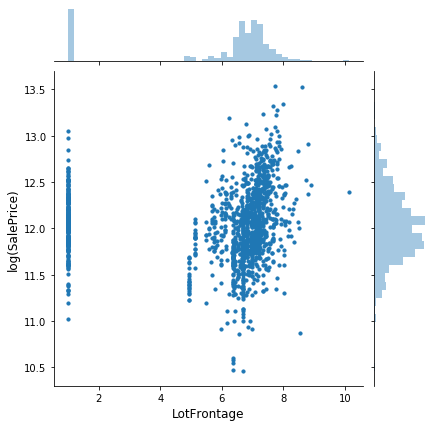

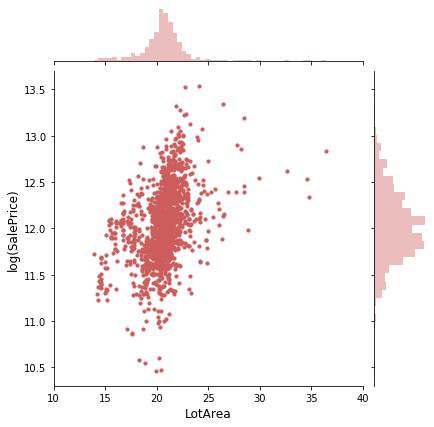

In [49]:
# to check after the box cox
plt.figure(figsize=(20,20))
g1 = sns.jointplot(trainX['LotFrontage'],y_log, s = 10)
g1.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)
g2 = sns.jointplot(trainX['LotArea'],y_log, color="indianred", s = 10, xlim  = [10, 40])
g2.set_axis_labels('LotArea', 'log(SalePrice)', fontsize=12)

In [50]:
#Create Dummy variable for finished bsmt
#not distinguishing between finish quality for basement only if the basement is unfinished
test_train['BsmtFin']= (test_train['BsmtFinType1'] != 'Unf')*1

In [51]:
#listing categorical values so we can create dummy columns
ctd = test_train
dl = []
for i in ctd:
    if ctd[i].dtype == 'O':
        dl.append(i)
print(dl)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [52]:
#Creating Dummy variables, and dropping first instances
test_train = pd.get_dummies(ctd, columns = ['MSZoning', 'Street','LotShape','LandContour','Utilities', \
                          'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', \
                          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
                          'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                          'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
                          'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', \
                          'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', \
                          'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first = True)

In [53]:
#to check the final test_train after imputation and dummification
test_train
#2917 rows with 251 columns

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
train 0       6.684507     6.831328  20.212182     3.440268     3.055642   
      1       4.858807     7.221214  20.712205     3.259674     3.602594   
      2       6.684507     6.914940  21.347241     3.440268     3.055642   
      3       6.968981     6.684507  20.691553     3.440268     3.055642   
      4       6.684507     7.314735  22.325160     3.602594     3.055642   
      5       6.357203     7.337529  22.282283     3.055642     3.055642   
      6       4.858807     7.098626  20.907529     3.602594     3.055642   
      7       6.684507     1.000000  21.023862     3.440268     3.259674   
      8       6.357203     6.392276  18.989871     3.440268     3.055642   
      9       8.990963     6.357203  19.712544     3.055642     3.259674   
      10      4.858807     6.968981  21.329199     3.055642     3.055642   
      11      6.684507     7.337529  21.584023     3.750250     3.055642   
      12      4.858807     1.000000  21.929243     3.055642     3.259674   
      13      4.858807     7.469750  21.126838     3.440268     3.055642   
      14      4.858807     1.000000  21.226881     3.259674     3.055642   
      15      6.172535     6.392276  18.989871     3.440268     3.602594   
      16      4.858807     1.000000  21.343998     3.259674     3.440268   
      17      7.448232     7.021742  21.178990     2.820334     3.055642   
      18      4.858807     6.859551  22.155939     3.055642     3.055642   
      19      4.858807     6.968981  19.783793     3.055642     3.259674   
      20      6.684507     7.674652  22.311893     3.602594     3.055642   
      21      6.172535     6.591427  19.727396     3.440268     3.440268   
      22      4.858807     7.098626  20.770362     3.602594     3.055642   
      23      8.020909     6.133567  17.656244     3.055642     3.440268   
      24      4.858807     1.000000  20.117502     3.055642     3.602594   
      25      4.858807     7.844946  22.316319     3.602594     3.055642   
      26      4.858807     6.684507  19.598238     3.055642     3.440268   
      27      4.858807     7.615044  21.428657     3.602594     3.055642   
      28      4.858807     6.248357  22.897710     3.055642     3.259674   
      29      5.492018     6.684507  19.111423     2.820334     3.259674   
...                ...          ...        ...          ...          ...   
test  1429    5.492018     6.357203  19.507860     2.820334     3.259674   
      1430    6.357203     7.098626  20.484144     3.259674     3.055642   
      1431    5.492018     6.942124  21.733197     2.540963     3.055642   
      1432    8.990963     6.357203  20.458096     3.055642     3.259674   
      1433    6.357203     6.684507  20.244223     2.540963     3.055642   
      1434    8.020909     6.012077  18.759065     3.602594     3.055642   
      1435    8.020909     6.133567  17.327057     3.602594     3.055642   
      1436    4.858807     6.942124  24.518465     3.259674     3.259674   
      1437    7.448232     6.831328  20.182228     3.259674     3.055642   
      1438    4.858807     6.968981  20.508324     3.602594     3.055642   
      1439    7.221214     8.338607  21.285618     3.259674     3.259674   
      1440    4.858807     1.000000  28.131123     3.259674     3.055642   
      1441    4.858807     1.000000  20.047559     3.259674     3.055642   
      1442    4.858807     7.553880  22.132420     3.602594     3.055642   
      1443    4.858807     7.404587  21.463582     3.750250     3.055642   
      1444    4.858807     8.104297  25.820844     1.730463     2.540963   
      1445    7.448232     7.172972  19.502486     3.440268     3.055642   
      1446    8.620056     6.012077  16.099791     3.055642     3.259674   
      1447    4.858807     6.622899  20.942183     3.055642     3.440268   
      1448    7.448232     1.000000  21.553764     3.055642     3.055642   
      1449    8.873203     4.932510  14.242388     2.820334 

In [54]:
# Check the Final Missing Values Data Frame: Test_Train 
missing = test_train.isna().sum()
missing = missing[missing>0]
missing_percent = missing/test_train.shape[0] * 100
test_train_missing = pd.DataFrame([missing, missing_percent], index = ['total', 'missing percent']).T
test_train_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing

,total,missing percent


<h3> Spliting the dataset back to train and test </h3>

In [55]:
#final test and train dataset
final_train = test_train.iloc[:1458,:]
final_test = test_train.iloc[1458:,:]
print('final_train', final_train.shape, 'final_test', final_test.shape)
#final_train(1458,251) final_test (1459.251)

final_train (1458, 251) final_test (1459, 251)


In [56]:
#created SalePrice df that just includes SalePrice. 
SalePrice = train.iloc[:,-1:]
SalePrice
#1458 rows and 1 column

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [57]:
# Check the Final Missing Values Data Frame: SalePrice
missingsale = SalePrice.isna().sum()
missingsale = missingsale[missingsale>0]
missing_percentsale = missingsale/SalePrice.shape[0] * 100
SalePrice_missing = pd.DataFrame([missingsale, missing_percentsale], index = ['total', 'missing percent']).T
SalePrice_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing!

,total,missing percent


In [58]:
#make final_trainRsale
final_trainRsale = final_train
final_trainRsale = final_trainRsale.reset_index()

In [59]:
SalePrice['SalePrice'].isnull().unique()

array([False])

In [60]:
#reset index for SalePrice
SalePrice = SalePrice.reset_index()

In [61]:
#put back the SalePrice to train dataset
final_trainRsale['SalePrice'] = SalePrice['SalePrice']

In [62]:
#get rid of level_0 and level_1 columns of final_train
del final_trainRsale['level_0']
del final_trainRsale['level_1']

In [63]:
#check the final_train dataset
final_trainRsale.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,6.684507,6.831328,20.212182,3.440268,3.055642,15.187527,15.187527,9.059126,12.170327,1.0,...,0,0,0,1,0,0,0,1,0,208500
1,4.858807,7.221214,20.712205,3.259674,3.602594,15.145138,15.145138,1.000000,13.062832,1.0,...,0,0,0,1,0,0,0,1,0,181500
2,6.684507,6.914940,21.347241,3.440268,3.055642,15.184404,15.185966,8.646538,11.200343,1.0,...,0,0,0,1,0,0,0,1,0,223500
3,6.968981,6.684507,20.691553,3.440268,3.055642,15.047529,15.135652,1.000000,9.274266,1.0,...,0,0,0,1,0,0,0,0,0,140000
4,6.684507,7.314735,22.325160,3.602594,3.055642,15.182841,15.182841,10.391827,11.971129,1.0,...,0,0,0,1,0,0,0,1,0,250000


In [64]:
#reset index for test train
final_test = final_test.reset_index()

In [65]:
#get rid of level_0 and level_1 columns of final_test
del final_test['level_0']
del final_test['level_1']

In [66]:
#check the final_test dataset
final_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.858807,7.221214,21.479373,3.055642,3.259674,15.121376,15.121376,1.000000,11.105326,8.397498,...,0,0,0,0,1,0,0,0,1,0
1,4.858807,7.244956,22.327220,3.259674,3.259674,15.116605,15.116605,7.808145,12.901094,1.000000,...,0,0,0,0,1,0,0,0,1,0
2,6.684507,7.073289,22.196905,3.055642,3.055642,15.178149,15.179714,1.000000,12.476685,1.000000,...,0,0,0,0,1,0,0,0,1,0
3,6.684507,7.172972,20.865444,3.259674,3.259674,15.179714,15.179714,4.858807,11.749651,1.000000,...,0,0,0,0,1,0,0,0,1,0
4,8.020909,6.093857,18.257255,3.602594,3.055642,15.170316,15.170316,1.000000,9.720170,1.000000,...,0,0,0,0,1,0,0,0,1,0


In [67]:
# Check the Final Missing Values Data Frame: final_train
missingfinaltrain = final_trainRsale.isna().sum()
missingfinaltrain = missingfinaltrain[missingfinaltrain>0]
missing_percentftrain = missingfinaltrain/final_train.shape[0] * 100
final_train_missing = pd.DataFrame([missingfinaltrain, missing_percentftrain], index = ['total', 'missing percent']).T
final_train_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing

,total,missing percent


In [68]:
# Check the Final Missing Values Data Frame: final_train
missingfinaltest = final_test.isna().sum()
missingfinaltest = missingfinaltest[missingfinaltest>0]
missing_percentftest = missingfinaltest/final_test.shape[0] * 100
final_test_missing = pd.DataFrame([missingfinaltest, missing_percentftest], index = ['total', 'missing percent']).T
final_test_missing.sort_values(['missing percent'], ascending = [False])
#nothing missing!

,total,missing percent


In [69]:
# SalePrice log series to the dataframe
y_log = y_log.to_frame()

In [70]:
#To check y_log
type(y_log)

pandas.core.frame.DataFrame

In [71]:
#reset index for y_log
y_log = y_log.reset_index()

In [72]:
y_log.head()

,index,SalePrice
0,0,12.247699
1,1,12.109016
2,2,12.317171
3,3,11.849405
4,4,12.429220


In [73]:
final_trainwithYLOG = final_train
final_trainwithYLOG = final_trainwithYLOG.reset_index()

In [74]:
final_trainwithYLOG['ylogSalePrice'] = y_log['SalePrice']

In [77]:
#get rid of level_0 and level_1 columns of final_test
del final_trainwithYLOG['level_0']
del final_trainwithYLOG['level_1']

In [78]:
#check final_trainwithYLOG
final_trainwithYLOG.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,ylogSalePrice
0,6.684507,6.831328,20.212182,3.440268,3.055642,15.187527,15.187527,9.059126,12.170327,1.0,...,0,0,0,1,0,0,0,1,0,12.247699
1,4.858807,7.221214,20.712205,3.259674,3.602594,15.145138,15.145138,1.000000,13.062832,1.0,...,0,0,0,1,0,0,0,1,0,12.109016
2,6.684507,6.914940,21.347241,3.440268,3.055642,15.184404,15.185966,8.646538,11.200343,1.0,...,0,0,0,1,0,0,0,1,0,12.317171
3,6.968981,6.684507,20.691553,3.440268,3.055642,15.047529,15.135652,1.000000,9.274266,1.0,...,0,0,0,1,0,0,0,0,0,11.849405
4,6.684507,7.314735,22.325160,3.602594,3.055642,15.182841,15.182841,10.391827,11.971129,1.0,...,0,0,0,1,0,0,0,1,0,12.429220


In [79]:
#Exporting final cleaned train dataset and cleaned 
final_trainRsale.to_csv('cleanedtrain.csv')
final_test.to_csv('cleanedtest.csv')
final_trainwithYLOG.to_csv('cleanedtrainwithYlog.csv')